In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import to_categorical

from keras.datasets import mnist

import numpy as np

from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.metrics import confusion_matrix

import pandas as pd
import seaborn as sns

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Load the mnist training and test data sets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Display the first five images and the labels

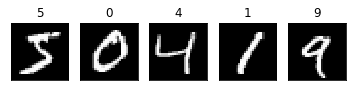

In [3]:
def plot_gray_image(img, title, ax):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(img, cmap=cm.gray)
    ax.set_title(title)
    
fig, ax_list = plt.subplots(nrows=1, ncols=5)
for idx, ax in enumerate(ax_list):
    plot_gray_image(X_train[idx], y_train[idx], ax)

Flatten the two dimensional input data and center it around zero

In [4]:
img_size = X_train.shape[1] * X_train.shape[2]
X_train_flat = X_train.reshape(-1, img_size)
X_test_flat = X_test.reshape(-1, img_size)

X_train_flat = X_train_flat/255
X_test_flat = X_test_flat/255

In [5]:
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [6]:
batch_size = 128
epochs = 10

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(img_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X_train_flat, y_train_cat,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_flat, y_test_cat))
score = model.evaluate(X_test_flat, y_test_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.2453 - acc: 0.9244 - val_loss: 0.1213 - val_acc: 0.9632
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.1017 - acc: 0.9691 - val_loss: 0.0864 - val_acc: 0.9747
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0758 - acc: 0.9776 - val_loss: 0.0675 - val_acc: 0.9795
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0585 - acc: 0.9819 - val_loss: 0.0907 - val_acc: 0.9743
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0507 - acc: 0.9847 - val_loss: 0.0752 - val_acc: 0.9812
Epoch 6/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0424 - acc: 0.9873 - val_loss: 0.0770 - val_acc: 0.9808
Epoch 7/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0374 - acc: 0.9891 - val_loss: 0.0797 - val_acc

In [8]:
y_predict = model.predict_classes(X_test_flat)

10000/10000 [==============================] - 0s 36us/step


Display numbers where the prediction is wrong

In [11]:
err_idx = np.where(y_test != y_predict)[0]

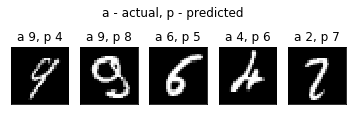

In [12]:
err_plot_size = 5
fig, ax_list = plt.subplots(nrows=1, ncols=err_plot_size)
fig.set_size_inches(w=6, h=2)
fig.suptitle('a - actual, p - predicted')
for idx, ax in enumerate(ax_list):
    data_idx = err_idx[idx]
    msg = 'a {}, p {}'.format(y_test[data_idx], y_predict[data_idx])
    plot_gray_image(X_test[data_idx], msg, ax)

In [13]:
cmatrix = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cmatrix)
df_cm

,0,1,2,3,4,5,6,7,8,9
0,968,1,1,1,2,1,3,1,1,1
1,0,1120,1,1,0,1,2,2,8,0
2,1,0,1013,5,1,0,1,5,6,0
3,1,0,1,997,0,2,0,4,3,2
4,1,0,1,0,970,0,5,1,1,3
5,2,0,0,7,1,877,2,0,2,1
6,1,2,0,1,5,5,943,0,1,0
7,0,2,6,0,1,0,0,1012,3,4
8,3,0,3,4,3,2,0,2,954,3
9,1,3,0,3,12,3,1,1,2,983


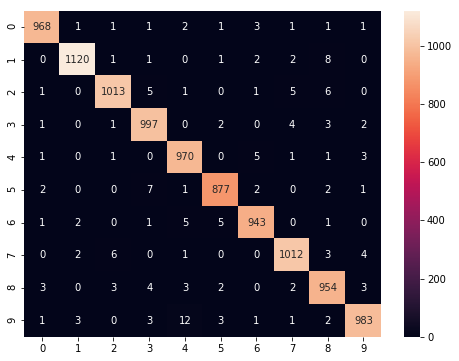

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='.0f', ax=ax)